In [108]:
from tensorflow import keras as k
(x, y), (xT, yT) = k.datasets.boston_housing.load_data()


In [109]:
# Preprocessing
x = (x - x.mean()) / x.std()
xT = (xT - xT.mean()) / xT.std()

In [110]:
print(x.shape)
def build_model():
    model = k.models.Sequential()
    model.add(k.layers.Dense(64, activation='relu', input_shape=(13, )))
    model.add(k.layers.Dense(64, activation='relu'))
    model.add(k.layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


(404, 13)


In [111]:
def train_model(epoch):
    model = build_model()
    xVal, xTrain = x[:10], x[10:]
    yVal, yTrain = y[:10], y[10:]
    history = model.fit(xTrain, yTrain, epochs=epoch, validation_data=(xVal, yVal))
    return (history, model)

Epoch 1/6
13/13 [==============================] - 0s 10ms/step - loss: 514.7386 - mae: 20.7245 - val_loss: 505.7288 - val_mae: 18.8428
Epoch 2/6
13/13 [==============================] - 0s 2ms/step - loss: 412.3280 - mae: 17.9315 - val_loss: 393.6961 - val_mae: 15.6381
Epoch 3/6
13/13 [==============================] - 0s 2ms/step - loss: 306.1022 - mae: 14.6673 - val_loss: 284.9509 - val_mae: 12.0194
Epoch 4/6
13/13 [==============================] - 0s 2ms/step - loss: 208.5162 - mae: 11.3515 - val_loss: 198.5092 - val_mae: 8.8362
Epoch 5/6
13/13 [==============================] - 0s 3ms/step - loss: 141.5151 - mae: 8.8562 - val_loss: 157.0912 - val_mae: 8.5475
Epoch 6/6
13/13 [==============================] - 0s 2ms/step - loss: 110.0031 - mae: 7.6661 - val_loss: 146.7688 - val_mae: 9.2909


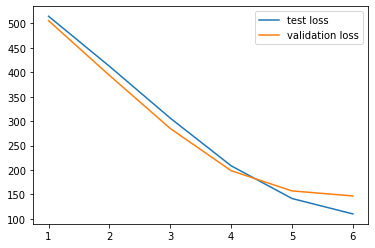

In [112]:
import matplotlib.pyplot as plt
epoch = 6
(history, model) = train_model(epoch)
hist = history.history
epochs = range(1, epoch + 1)

plt.plot(epochs, hist['loss'], label='test loss')
plt.plot(epochs, hist['val_loss'], label='validation loss')
plt.legend()

In [120]:
validationScore = model.evaluate(xVal, yVal)
print(validationScore)
testScore = model.evaluate(xT, yT)
print(testScore)

1/1 [==============================] - 0s 1ms/step - loss: 146.7688 - mae: 9.2909
[146.76882934570312, 9.290925979614258]
4/4 [==============================] - 0s 748us/step - loss: 114.2523 - mae: 7.9916
[114.25225830078125, 7.991578578948975]


In [124]:
import numpy as np
pred = model.predict(xT)
# print(u @ v.T)
M = pred[:,0] - yT
error = (M @ M) / len(yT)
print("Error is within", round(error, 2), "using hold out validation")

Error is within 114.25 using hold out validation


In [129]:
# Using K fold validation
def train_model_kfold(epoch, xTrain, yTrain):
    model = build_model()
    model.fit(xTrain, yTrain, epochs=epoch)
    return model
N = 4
xList = np.split(x, N)
yList = np.split(y, N)
print(len(arr_lst))

errors = []
for i in range(N):
    testX = np.concatenate(xList[:i] + xList[i+1:])
    testY = np.concatenate(yList[:i] + yList[i+1:])
    modelK = train_model_kfold(epoch, testX, testY)
    errors.append(modelK.evaluate(xList[i], yList[i])[1])
print(errors)
    

4
Epoch 1/6
10/10 [==============================] - 0s 2ms/step - loss: 554.6882 - mae: 21.7292
Epoch 2/6
10/10 [==============================] - 0s 1ms/step - loss: 472.5549 - mae: 19.6922
Epoch 3/6
10/10 [==============================] - 0s 1ms/step - loss: 387.7147 - mae: 17.3776
Epoch 4/6
10/10 [==============================] - 0s 1ms/step - loss: 298.7039 - mae: 14.5857
Epoch 5/6
10/10 [==============================] - 0s 1ms/step - loss: 218.8743 - mae: 11.8977
Epoch 6/6
4/4 [==============================] - 0s 1ms/step - loss: 137.0022 - mae: 8.5177
Epoch 1/6
10/10 [==============================] - 0s 1ms/step - loss: 553.2073 - mae: 21.5134
Epoch 2/6
10/10 [==============================] - 0s 994us/step - loss: 474.2892 - mae: 19.5216
Epoch 3/6
10/10 [==============================] - 0s 1ms/step - loss: 392.2339 - mae: 17.2572
Epoch 4/6
10/10 [==============================] - 0s 1ms/step - loss: 306.8337 - mae: 14.5310
Epoch 5/6
10/10 [==============================] 

In [141]:
print(np.array(errors).mean())

8.278509616851807
